---Part A and Part B---



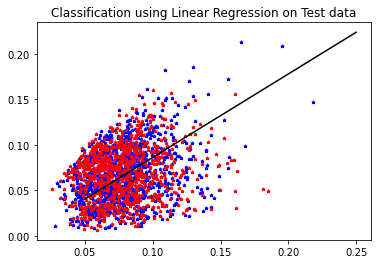

E_in with Linear Regression with improvement through Pocket:  0.38307638906675356
E_out with Linear Regression with improvement through Pocket:  0.3626544623436043

--------------------------------
Logistic regression training error E_in:  0.38470726282766776
Logistic regression test error E_out:  0.3403626953240749


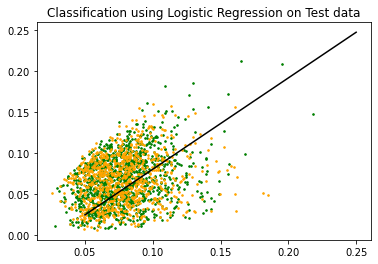


----Part C ----
Finding bounds on the E_in and E_out for both regressors
For Linear Regression
The VC Bound on E_train:  0.12715139614855864
The out of sample error bound for Training set:  0.5101513961485586
The VC Bound on E_test:  0.03016514099350197
The out of sample error bound for Test set:  0.39216514099350197

For Logistic Regression
The VC Bound on E_train:  0.15103018147702696
The out of sample error bound for Training set:  0.535030181477027
The VC Bound on E_train:  0.03016514099350197
The out of sample error bound for Test set:  0.370165140993502

----- Part D-----
Repeating for Polynomial Transform
E_in with Linear Regression Polynomial Transform:  0.3268875513688708
E_out with Linear Regression Polynomial Transform:  0.3033997398295565
Logistic regression Polynomial Transform E_in:  0.38304330407841314
Logistic regression Polynomial Transform E_out:  0.08189442525900345


In [1]:
from re import X
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns

class LinearRegression_me():
    def __init__(self) :
        self = self
        
    def fit(self,X_train_processed,Y) :
             
        # linear regression
        self.X_dagger = np.dot(np.linalg.inv(np.dot(X_train_processed.T, X_train_processed)), X_train_processed.T)
        self.weights = np.dot(self.X_dagger, Y)
        return self.weights
        

        
    def predict( self, X_train_processed) :
        self.X_dagger1 = np.dot(np.linalg.inv(np.dot(X_train_processed.T, X_train_processed)), X_train_processed.T)
        Y_pred = np.sign(np.dot(self.weights.T, self.X_dagger1))

        return Y_pred,self.weights
    
    def Error(self,X,Y,Y_pred):
        
        m,n = X.shape
        for i in range(0,len(Y)):
            if(Y[i] == 5):
                Y[i] = 1
            else:
                Y[i] = -1
        E_in = 0
        E_in = sum(Y_pred != Y)  / m
        return E_in

        
def Pocket(X,Y, weights) :
    
    R,C = X.shape
    for epoch in range(0,100000):
        i = np.random.randint(low=0,high=R)
        s = np.dot(weights.T,np.array(X[i]))
        if((Y[i] * s) <= 0) :
            weights = weights + 0.1*((Y[i])-(s)*X[i])
            
    X_dagger1 = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T)
    Y_pred = np.sign(np.dot(weights.T, X_dagger1))
    return Y_pred
            
     
def processing(data_set):
    Intensity = []
    Symmetry = []
    O = np.ones(len(data_set))
    for i in range(0, len(data_set)):
        Intensity.append(data_set[i].mean())
        Symmetry.append(np.mean(abs(data_set[i]-np.flip(data_set[i]))))
    processed_set = np.column_stack((O, Intensity, Symmetry))
    return processed_set

def plot_separators(p):
    p0 = p[0][0];
    p1 = p[0][1];
    p2 = p[0][2];
    y1 = -1*(p1/p2)*-(0.05)+(-1*p0/p2)
    y2 = -1*(p1/p2)*-0.5+(-1*p0/p2);
    Xline1 = [0.05, 0.5]
    Yline1 = [y1, y2]
    plt.plot(Xline1, Yline1,'k')
    plt.title('Logistic Regression on Training data')
    plt.show()
    
def processing(data_set):
    Intensity = []
    Symmetry = []
    O = np.ones(len(data_set))
    for i in range(0, len(data_set)):
        Intensity.append(data_set[i].mean())
        Symmetry.append(np.mean(abs(data_set[i]-np.flip(data_set[i]))))
    processed_set = np.column_stack((O, Intensity, Symmetry))
    return processed_set, Intensity, Symmetry

def polynomial_transform(input_data):
    transform = lambda x: [1, x[1], x[2], x[1] ** 2, x[1] * x[2], x[2] ** 2, x[2] ** 3, np.dot(x[1]**2, x[2]), np.dot(x[1], x[2]**2), x[2] ** 3]
    transformed_data=[transform(x) for x in input_data]
    transformed_data=np.array(transformed_data)
    return transformed_data

def gen_bound_E_in(N, delta, dvc):
    log_term_num = 4*(((2*N)**dvc)+1)
    bound = np.sqrt((8/N)*np.log(log_term_num/delta))
    growth = N+1
    return bound

def gen_bound_E_out(N,delta):
    bound = np.sqrt((1/(2*N)*np.log(2/delta)))
    return bound

def main():
    # Load the Data
    training_set = pd.read_csv(r"mnist_train_binary.csv")
    test_set = pd.read_csv(r"mnist_test_binary.csv")

    # Test Set Data Separation
    X_test_preprocessed = test_set.iloc[:,1:]
    X_test_preprocessed = X_test_preprocessed/255
    Y_test = test_set['label']

    # Training Set Data Separation
    X_train_preprocessed = training_set.iloc[:,1:]
    X_train_preprocessed = X_train_preprocessed/255
    Y_train = training_set['label']


    # Re-shaping training and test data
    X_train_preprocessed=np.reshape(np.ravel(X_train_preprocessed),(X_train_preprocessed.shape[0],28,28))     
    X_test_preprocessed=np.reshape(np.ravel(X_test_preprocessed),(X_test_preprocessed.shape[0],28,28))


    # Processed Data    
    X_train_processed, Intensity_train, Symmetry_train = processing(X_train_preprocessed)
    X_test_processed, Intensity_test, Symmetry_test = processing(X_test_preprocessed)

    # Model Fitting
    linear_me = LinearRegression_me()
    linear_me.fit(X_train_processed, Y_train)
    
    
    # Prediction on train set 
    Y_pred_lin_me, weights = linear_me.predict(X_train_processed)
    E_in = sum(Y_pred_lin_me != Y_train)  / len(Y_train)
    #E_in = r2_score(Y_pred_lin_me, Y_train)
    #print("Linear Regression E_in is: ", E_in)
    
           # Improvement using Pocket Algorithm
    Y_pred_improved = Pocket(X_train_processed, Y_train, weights)
    E_in = sum(Y_pred_improved != Y_train)  / len(Y_train)
    #E_in = 1 - r2_score(Y_pred_lin_me, Y_train)
    #print("Linear Regression E_in with Pocket is: ", E_in)
    
    # Prediction on test set 
    Y_pred_lin_me, w = linear_me.predict(X_test_processed)
    E_out = sum(Y_pred_lin_me != Y_test)  / len(Y_test)
    #E_out = 1 - r2_score(Y_pred_lin_me, Y_test)
    #print("Linear Regression E_out is: ", E_out)
    
          # Improvement using Pocket Algorithm
    Y_pred_improved = Pocket(X_test_processed, Y_test, weights)
    E_out = sum(Y_pred_improved != Y_test)  / len(Y_test)
    #E_out = 1 - r2_score(Y_pred_improved, Y_test)
    #print("Linear Regression E_out with Pocket is: ", E_out)
    print("---Part A and Part B---")
    print("\v")
    # Plotting Data and Separators
    Intensity = Intensity_train
    Symmetry = Symmetry_train

    for i in range(0, len(Y_test)):
        if Y_test[i]==1:
            plt.scatter(Intensity[i], Symmetry[i], label= "stars", color= "blue", marker= "*", s=10)
        elif Y_test[i]!=1:
            plt.scatter(Intensity[i], Symmetry[i], label= "stars", color= "red", marker= "*", s=10)
    p = weights
    p0 = p[0];
    p1 = p[1];
    p2 = p[2];
    y1 = -1*(p1/p2)*-(0.05)+(-1*p0/p2)
    y2 = -1*(p1/p2)*-0.5+(-1*p0/p2);
    Xline1 = [0.05, 0.25]
    Yline1 = [y1, y2]
    plt.plot(Xline1, Yline1,'k')
    plt.title('Classification using Linear Regression on Test data')
    plt.show()
    
    ### Linear Regression Scikit learn Implementation
    
    linear =LinearRegression() 
    linear.fit(X_train_processed,Y_train)
    Y_pred_lin = linear.predict(X_test_processed)
    Y_pred_lin_train = linear.predict(X_train_processed)
    w_final = linear.coef_
    E_in = 1 - r2_score(Y_train, Y_pred_lin_train)
    E_out = 1- r2_score(Y_test, Y_pred_lin)
    print('E_in with Linear Regression with improvement through Pocket: ', E_in)
    print('E_out with Linear Regression with improvement through Pocket: ', E_out)

    print('\v')
    print('--------------------------------')
   
    
    ### Logistic Regression using Gradient Descent
    
    # Model Fitting
    Log_reg_model = LogisticRegression()
    reg=Log_reg_model.fit(X_train_processed,Y_train)
    p = reg.coef_
    
    
    # Prediction on training set
    Y_pred_log_train = Log_reg_model.predict(X_train_processed)
    m,n = X_train_processed.shape
    E_in = 1 - r2_score(Y_train, Y_pred_log_train)
    print("Logistic regression training error E_in: ", E_in)
    
    # Prediction on test set
    Y_pred_log_test = Log_reg_model.predict(X_test_processed)
    probabilities = Log_reg_model.predict_proba(X_test_processed)
    m,n = X_test_processed.shape
    E_out = 1- r2_score(Y_test, Y_pred_log_test)
    print("Logistic regression test error E_out: ",E_out)
    
    for i in range(0, len(Y_test)):
        if Y_test[i]==1:
            plt.scatter(Intensity[i], Symmetry[i], label= "dots", color= "green", marker= ".", s=10)
        elif Y_test[i]!=1:
            plt.scatter(Intensity[i], Symmetry[i], label= "dots", color= "orange", marker= ".", s=10)
    p0 = p[0][0]
    p1 = p[0][1]
    p2 = p[0][2]
    y1 = -1*(p1/p2)*-(0.05)+(-1*p0/p2)
    y2 = -1*(p1/p2)*-0.5+(-1*p0/p2);
    Xline1 = [0.05, 0.25]
    Yline1 = [y1, y2]
    plt.plot(Xline1, Yline1,'k')
    plt.title('Classification using Logistic Regression on Test data')
    plt.show()
    
    
    # print('----Rough Trial---')
    # X = np.linspace(-0.5, 1.5, len(Y_test))
    # for i in range(0,len(Y_test)):
    #         if(Y_test[i] == 5):
    #             Y_test[i] = 1
    #         else:
    #             Y_test[i] = -1
    # plt.scatter(X, Y_test)
    # for i in range(0,len(Y_pred_log_test)):
    #         if(Y_pred_log_test[i] == 5):
    #             Y_pred_log_test[i] = 1
    #         else:
    #             Y_pred_log_test[i] = -1
    # plt.scatter(X, Y_pred_log_test, c= 'red')
    
    # --------------------------------------------------------------------
    print("\v")
    print("----Part C ----")
    print('Finding bounds on the E_in and E_out for both regressors')
    dvc_log_reg = 3
    dvc_lin_reg = 2
    delta = 0.05
    
    # Linear Regression Training
       # Training Data
    N = len(X_train_processed)
    Bound_E_in = gen_bound_E_in(N, delta, dvc_lin_reg)
    E_in = 0.383 + Bound_E_in
    print("For Linear Regression")
    print("The VC Bound on E_train: ", Bound_E_in)
    print("The out of sample error bound for Training set: ", E_in)
       # Testing Data
    N = len(X_test_processed)
    Bound_E_out = gen_bound_E_out(N, delta)
    E_out = 0.362 + Bound_E_out
    print("The VC Bound on E_test: ", Bound_E_out)
    print("The out of sample error bound for Test set: ", E_out)
    print('\v')
    
    
    # Logistic Regression 
       # Training Data
    N = len(X_train_processed)
    Bound_E_in = gen_bound_E_in(N, delta, dvc_log_reg)
    E_in =0.384 + Bound_E_in
    print("For Logistic Regression")
    print("The VC Bound on E_train: ", Bound_E_in)
    print("The out of sample error bound for Training set: ", E_in)
    
       # Testing Data
    N = len(X_test_processed)
    Bound_E_out = gen_bound_E_out(N, delta)
    E_out = 0.340 + Bound_E_out
    print("The VC Bound on E_train: ", Bound_E_out)
    print("The out of sample error bound for Test set: ", E_out)

# ------------------------------------------------------------------- 
    
    print('\v')
    print("----- Part D-----")
    print("Repeating for Polynomial Transform")
    #-- Linear --#
    X_train_processed = polynomial_transform(X_train_processed)
    X_test_processed = polynomial_transform(X_test_processed)
    linear =LinearRegression() 
    linear.fit(X_train_processed,Y_train)
    Y_pred_lin = linear.predict(X_test_processed)
    Y_pred_lin_train = linear.predict(X_train_processed)
    w_final = linear.coef_
    E_in = 1 - r2_score(Y_train, Y_pred_lin_train)
    E_out = 1- r2_score(Y_test, Y_pred_lin)
    print ('E_in with Linear Regression Polynomial Transform: ', E_in)
    print('E_out with Linear Regression Polynomial Transform: ', E_out)
    
    #-- Logistic --#
    Log_reg_model = LogisticRegression()
    reg=Log_reg_model.fit(X_train_processed,Y_train)
    p = reg.coef_
    
    # Prediction on training set
    Y_pred_log_train = Log_reg_model.predict(X_train_processed)
    E_in = 1 - r2_score(Y_train, Y_pred_log_train)
    print("Logistic regression Polynomial Transform E_in: ", E_in)
    
    # Prediction on test set
    Y_pred_log_test = Log_reg_model.predict(X_test_processed)
    probabilities = Log_reg_model.predict_proba(X_test_processed)
    #E_out = 1- r2_score(Y_test, Y_pred_log_test)
    E_out = sum(Y_pred_log_test != Y_test)  / len(Y_test)
    print("Logistic regression Polynomial Transform E_out: ",E_out)




if __name__ == "__main__" :     
    main()